### Student Information
Name: Mohamed Syaheer Altaf (阿爾塔夫)

Student ID: 113065423

School: National Tsing Hua University

Github Username: syaheer-altaf

GitHub ID: 149253478

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

# 1. Data Preparation

In [44]:
# Download and load the dataset using `datasets` module
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
print(ds)

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})


# 2. Data Transformation

In [45]:
# main approach here: 1) to convert the dataset to a pandas dataframe, 
#                     2) check for missing values to determine the next step.
#                     3) check for duplicate comments to determine the next step.
import pandas as pd
import numpy as np
# we only take 'comment' and 'sentiment' columns
df = pd.DataFrame(ds['train'])
print(df)

# this handles both nulls and any non-standard missing values like empty strings
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # convert empty or whitespace-only strings to np.nan

# checking for missing values in the dataset
print("\n\nCheck for nulls:\n")
print(df.isnull().sum())

# checking for duplicate comments in the dataset
print("\n\nCheck for duplicate comments:\n")
print(df.duplicated('comment').sum())

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


Check for nulls:

sentiment    0
comment      0
dtype: int64


Check for duplicate comments:

1


## a. Handling Missing Values

In [46]:
# drop rows with missing comments or sentiments (although it's 0 for both -- just in case) :)
df.dropna(inplace=True)

print("Check for nulls:\n")
df.isnull().sum()

Check for nulls:



sentiment    0
comment      0
dtype: int64

## b. Handling Duplicate Data

In [47]:
# keep one copy of duplicates in the 'comment' column
df = df.drop_duplicates(subset='comment', keep='first')

print("Check for duplicate comments:\n")
print(df.duplicated('comment').sum())

print("\nCleaned dataframe:\n")
print(df)

Check for duplicate comments:

0

Cleaned dataframe:

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1499 rows x 2 columns]


## c. Transforming Sentiments for Binary Classification

In [48]:
# making sure the labels are unique
print(df['sentiment'].unique())

['not nostalgia' 'nostalgia']


In [49]:
# map sentiment labels to binary format ('nostalgia' = 1, 'not nostalgia' = 0)
df['sentiment'] = df['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})
print(df)
# quick look at the sentiment distribution
print("\n\nSentiment distribution:\n")
print(df['sentiment'].value_counts())

      sentiment                                            comment
0             0  He was a singer with a golden voice that I lov...
1             1  The mist beautiful voice ever I listened to hi...
2             1  I have most of Mr. Reeves songs.  Always love ...
3             0  30 day leave from 1st tour in Viet Nam to conv...
4             1  listening to his songs reminds me of my mum wh...
...         ...                                                ...
1495          0  i don't know!..but the opening of the video,.....
1496          0  it's sad this is such a beautiful song when yo...
1497          0  Dear Friend, I think age and time is not that ...
1498          1  I was born in 1954 and started to be aware of ...
1499          1  This is the first CD I bought after my marriag...

[1499 rows x 2 columns]


Sentiment distribution:

sentiment
1    750
0    749
Name: count, dtype: int64


# 3. Data Preprocessing

## a. Tokenization of Comments

In [56]:
# main approach: tokenization and stopword removal
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['comment'])

# check the shape of the transformed data
print("Shape of the document-term matrix:\n")
print(X.shape)

Shape of the document-term matrix:

(1499, 3485)


## b. Initial Data Explorations and Visualizations for Feature Selection

In [59]:
# main idea here is to show the distribution of important tokens (or words) through various
# visualization and non-visualization means.

### i. Sort Top-10 Words

In [60]:
# simple word frequency distribution
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))

# sort and print the top 10 frequent words
sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)
print(sorted_word_freq[:10])

[('song', 748), ('love', 309), ('music', 267), ('memories', 244), ('time', 213), ('great', 209), ('years', 184), ('beautiful', 172), ('like', 169), ('songs', 160)]


### ii. Visualizing using WordCloud

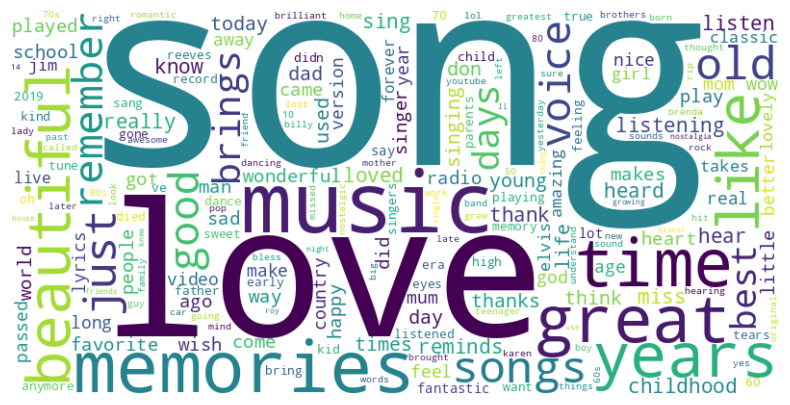

In [62]:
# We use wordcloud to have insight of important words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### iii. Visualizing using Zipf's law (Log Scale)

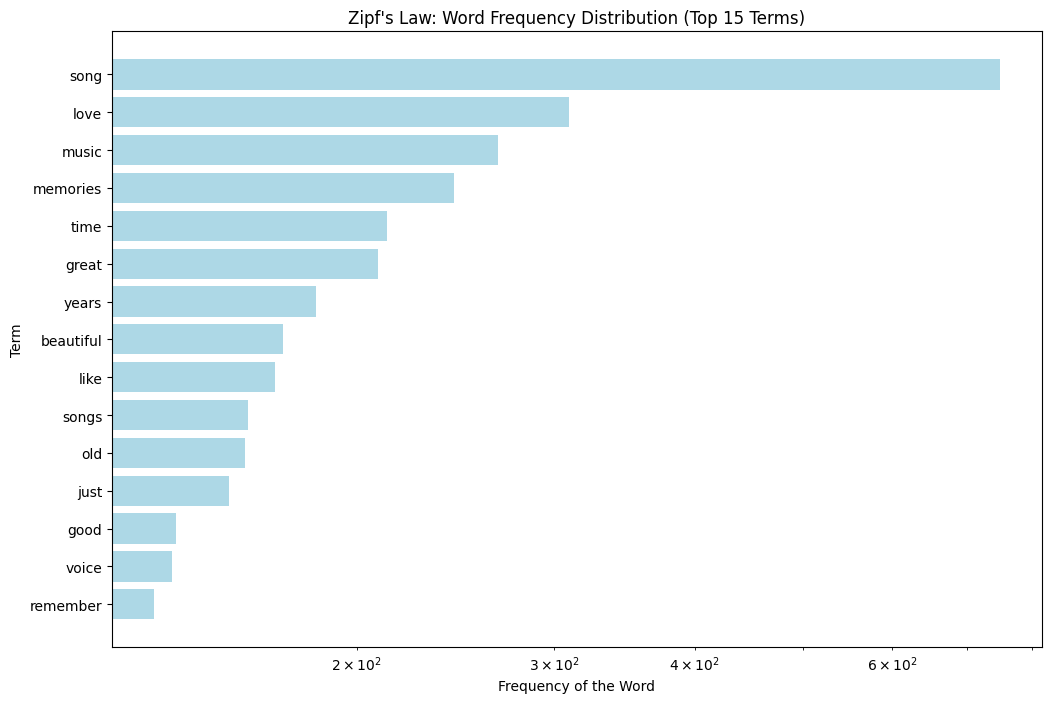

In [65]:
# define the number of top terms to display
num_terms_to_display = 15

# prepare data for Zipf's Law plot
terms, frequencies = zip(*sorted_word_freq[:num_terms_to_display])  # Limit to top N terms

# create a new dataframe for better manipulation
zipf_df = pd.DataFrame({'Term': terms, 'Frequency': frequencies})

# create a long-tail plot (terms vs. frequency)
plt.figure(figsize=(12, 8))
plt.barh(zipf_df['Term'], zipf_df['Frequency'], color='lightblue')
plt.xlabel('Frequency of the Word')
plt.ylabel('Term')
plt.title(f"Zipf's Law: Word Frequency Distribution (Top {num_terms_to_display} Terms)")
plt.gca().invert_yaxis()  # invert y-axis for better visualization
plt.xscale('log')  # log scale for frequency to show the long tail effect
plt.show()

### iv. TF-IDF Visualization

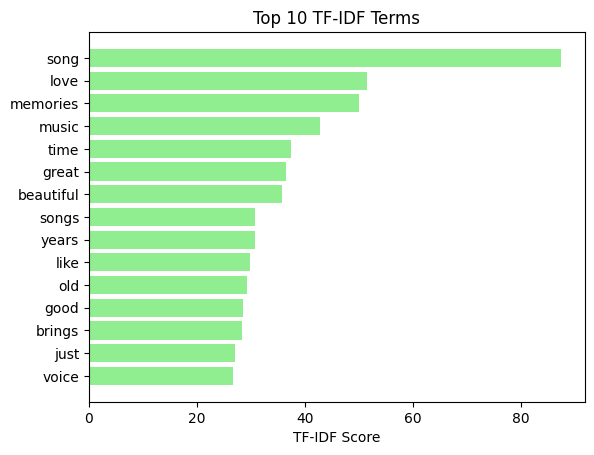

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# create tf-idf features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['comment'])

# Convert to a new dataframe for easier visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# sum the tf-idf scores for each term across all documents
tfidf_sum = tfidf_df.sum(axis=0)

# sort and get top N terms
top_n = 15
sorted_tfidf = sorted(zip(tfidf_sum.index, tfidf_sum.values), key=lambda item: item[1], reverse=True)

# plotting the top N TF-IDF terms
terms, scores = zip(*sorted_tfidf[:top_n])
plt.barh(terms, scores, color='lightgreen')
plt.xlabel('TF-IDF Score')
plt.title('Top 10 TF-IDF Terms')
plt.gca().invert_yaxis()  # invert y-axis for better visualization
plt.show()

In [69]:
# The key difference between Zipf's law and TF-IDF visualization lies in their focus:
# 
#   Zipf's law shows the frequency distribution of words across all comments. 
#   It highlights how a few words that are super common, while many others 
#   are rare, creating that long tail effect. This helps us see the overall language 
#   usage in our dataset.
#
#   On the other hand, TF-IDF focuses on the importance of words in the context of our 
#   specific dataset. It weighs the frequency of words but also considers how common 
#   they are across all documents. So, a word that pops up often in one comment but isn't 
#   common elsewhere gets a higher score, indicating it's more relevant for that comment's 
#   sentiment.
#
# In short, Zipf's law gives us a broad view of word usage, while TF-IDF helps us zero in 
# on what's important for our analysis. Which is why we will use the latter for our feature selection.
